In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
import pickle
import numpy as np
import pandas as pd
import seaborn

import matplotlib.pyplot as plt

from analysis import *

import sys
sys.path.insert(0, '../') 

%matplotlib inline

# CIFAR10

In [3]:
from get_cifar10 import get_cifar10_dataset

Xtr, Ytr, Xtt, Ytt = get_cifar10_dataset(0, n_samps=50000)
Xva, Yva = Xtt[:500], Ytt[:500]
Xtt, Ytt = Xtt[500:], Ytt[500:]
C2 = np.mean([np.sqrt(np.sum(np.square(i))) for i in Xtr])
gamma = 0.002*C2
eps_wrm = 1./(2*gamma)
eps = 0.05*C2

attacks_dict = {
    'erm': 0,
    'fgm': eps,
    'pgm': eps,
    'wrm': eps_wrm
}

In [4]:
# AlexNet
from dl_spectral_normalization.models import alexnet as model
arch = model.alexnet_sn
results_file = '/data/save_weights_tf1.10.1/results/table_results_cifar10_alexnet.pickle'
dirname = '/data/save_weights_tf1.10.1/cifar10/alexnet/'
table_results = get_table_results(Xtr, Ytr, Xva, Yva, Xtt, Ytt, arch,
                                  attacks_dict, results_file, dirname)

ERM training
beta = inf:	train acc 1.0000	validation acc 0.7620	test acc 0.7889
beta = 2.0:	train acc 0.9980	validation acc 0.8140	test acc 0.7898
WRM training
beta = inf:	train acc 0.9999	validation acc 0.5960	test acc 0.6113
beta = 1.3:	train acc 0.7564	validation acc 0.6120	test acc 0.6523
PGM training
beta = inf:	train acc 0.9854	validation acc 0.4820	test acc 0.5043
beta = 1.6:	train acc 0.9170	validation acc 0.5980	test acc 0.6159
FGM training
beta = inf:	train acc 0.9831	validation acc 0.5320	test acc 0.5441
beta = 1.6:	train acc 0.9318	validation acc 0.6180	test acc 0.6283


In [5]:
# AlexNet norm-inf attacks (eps=0.1)
from dl_spectral_normalization.models import alexnet as model
attacks_dict_orderinf = {
    'fgm': 0.1,
    'pgm': 0.1
}
arch = model.alexnet_sn
results_file = '/data/save_weights_tf1.10.1/results/table_results_cifar10_alexnet_orderinf_eps0.1.pickle'
dirname = '/data/save_weights_tf1.10.1/cifar10/alexnet_norminfattacks_eps0.1/'
table_results = get_table_results(Xtr, Ytr, Xva, Yva, Xtt, Ytt, arch,
                                  attacks_dict_orderinf, results_file, dirname, order=np.inf)

FGM training
beta = inf:	train acc 1.0000	validation acc 0.4700	test acc 0.5060
beta = 1.3:	train acc 0.6682	validation acc 0.5640	test acc 0.5597
PGM training
beta = inf:	train acc 0.9871	validation acc 0.4260	test acc 0.4379
beta = 1.6:	train acc 0.8605	validation acc 0.5220	test acc 0.5416


In [6]:
# AlexNet norm-inf attacks (eps=0.3)
from dl_spectral_normalization.models import alexnet as model
attacks_dict_orderinf = {
    'fgm': 0.3,
    'pgm': 0.3
}
arch = model.alexnet_sn
results_file = '/data/save_weights_tf1.10.1/results/table_results_cifar10_alexnet_orderinf_eps0.3.pickle'
dirname = '/data/save_weights_tf1.10.1/cifar10/alexnet_norminfattacks_eps0.3/'
table_results = get_table_results(Xtr, Ytr, Xva, Yva, Xtt, Ytt, arch,
                                  attacks_dict_orderinf, results_file, dirname, order=np.inf)

FGM training
beta = inf:	train acc 0.9932	validation acc 0.5500	test acc 0.5846
beta = 1.3:	train acc 0.8141	validation acc 0.6740	test acc 0.6731
PGM training
beta = inf:	train acc 0.5081	validation acc 0.2140	test acc 0.2088
beta = 1.3:	train acc 0.3711	validation acc 0.3520	test acc 0.3041


In [7]:
# AlexNet elu
from dl_spectral_normalization.models import alexnet as model
arch = model.alexnet_elu_sn
results_file = '/data/save_weights_tf1.10.1/results/table_results_cifar10_alexnet_elu.pickle'
dirname = '/data/save_weights_tf1.10.1/cifar10/alexnet_elu/'
table_results = get_table_results(Xtr, Ytr, Xva, Yva, Xtt, Ytt, arch,
                                  attacks_dict, results_file, dirname)

ERM training
beta = inf:	train acc 1.0000	validation acc 0.7700	test acc 0.7919
beta = 2.0:	train acc 0.9997	validation acc 0.7820	test acc 0.7892
WRM training
beta = inf:	train acc 0.9992	validation acc 0.5580	test acc 0.5960
beta = 4.0:	train acc 1.0000	validation acc 0.6020	test acc 0.5986
PGM training
beta = inf:	train acc 0.9808	validation acc 0.5280	test acc 0.5263
beta = 1.6:	train acc 0.8830	validation acc 0.5800	test acc 0.6069
FGM training
beta = inf:	train acc 0.9659	validation acc 0.5080	test acc 0.5223
beta = 1.3:	train acc 0.6812	validation acc 0.5820	test acc 0.6025


In [8]:
# mlp1 elu
from dl_spectral_normalization.models import mlp as model
arch = model.mlp1_elu_sn
results_file = '/data/save_weights_tf1.10.1/results/table_results_cifar10_mlp1_elu.pickle'
dirname = '/data/save_weights_tf1.10.1/cifar10/mlp1_elu/'
table_results = get_table_results(Xtr, Ytr, Xva, Yva, Xtt, Ytt, arch,
                                  attacks_dict, results_file, dirname, opt='adam')

ERM training
beta = inf:	train acc 0.9780	validation acc 0.4740	test acc 0.4920
beta = 0.8:	train acc 0.6800	validation acc 0.5100	test acc 0.5320
WRM training
beta = inf:	train acc 0.5977	validation acc 0.3620	test acc 0.4081
beta = 0.8:	train acc 0.6185	validation acc 0.4840	test acc 0.4967
PGM training
beta = inf:	train acc 0.5741	validation acc 0.3320	test acc 0.3587
beta = 0.8:	train acc 0.5513	validation acc 0.4200	test acc 0.4614
FGM training
beta = inf:	train acc 0.6030	validation acc 0.3300	test acc 0.3622
beta = 1.0:	train acc 0.6021	validation acc 0.4440	test acc 0.4616


In [9]:
# mlp2 elu
from dl_spectral_normalization.models import mlp as model
arch = model.mlp2_elu_sn
results_file = '/data/save_weights_tf1.10.1/results/table_results_cifar10_mlp2_elu.pickle'
dirname = '/data/save_weights_tf1.10.1/cifar10/mlp2_elu/'
table_results = get_table_results(Xtr, Ytr, Xva, Yva, Xtt, Ytt, arch,
                                  attacks_dict, results_file, dirname, opt='adam')

ERM training
beta = inf:	train acc 0.9901	validation acc 0.4620	test acc 0.5080
beta = 1.0:	train acc 0.7938	validation acc 0.5300	test acc 0.5587
WRM training
beta = inf:	train acc 0.8735	validation acc 0.3140	test acc 0.3523
beta = 1.0:	train acc 0.7272	validation acc 0.4740	test acc 0.5200
PGM training
beta = inf:	train acc 0.9341	validation acc 0.3300	test acc 0.3499
beta = 1.0:	train acc 0.6561	validation acc 0.4540	test acc 0.4835
FGM training
beta = inf:	train acc 0.5721	validation acc 0.3320	test acc 0.3581
beta = 1.0:	train acc 0.6611	validation acc 0.4600	test acc 0.4876


In [10]:
# Inception
from dl_spectral_normalization.models import inception as model
arch = model.inception_sn
results_file = '/data/save_weights_tf1.10.1/results/table_results_cifar10_inception.pickle'
dirname = '/data/save_weights_tf1.10.1/cifar10/inception/'
table_results = get_table_results(Xtr, Ytr, Xva, Yva, Xtt, Ytt, arch,
                                  attacks_dict, results_file, dirname)

ERM training
beta = inf:	train acc 1.0000	validation acc 0.8440	test acc 0.8541
beta = 1.6:	train acc 1.0000	validation acc 0.8720	test acc 0.8601
WRM training
beta = inf:	train acc 1.0000	validation acc 0.6520	test acc 0.6577
beta = 1.6:	train acc 1.0000	validation acc 0.6780	test acc 0.6718
PGM training
beta = inf:	train acc 0.9887	validation acc 0.5180	test acc 0.5266
beta = 1.6:	train acc 1.0000	validation acc 0.5840	test acc 0.5781
FGM training
beta = inf:	train acc 0.1000	validation acc 0.1140	test acc 0.0993
beta = 1.0:	train acc 0.6862	validation acc 0.6180	test acc 0.6225


In [11]:
# Inception norm-inf attacks (eps=0.1)
from dl_spectral_normalization.models import inception as model
attacks_dict_orderinf = {
    'fgm': 0.1,
    'pgm': 0.1
}
arch = model.inception_sn
results_file = '/data/save_weights_tf1.10.1/results/table_results_cifar10_inception_orderinf_eps0.1.pickle'
dirname = '/data/save_weights_tf1.10.1/cifar10/inception_norminfattacks_eps0.1/'
table_results = get_table_results(Xtr, Ytr, Xva, Yva, Xtt, Ytt, arch,
                                  attacks_dict_orderinf, results_file, dirname, order=np.inf)

FGM training
beta = inf:	train acc 1.0000	validation acc 0.5600	test acc 0.5693
beta = 1.0:	train acc 0.6363	validation acc 0.5680	test acc 0.5673
PGM training
beta = inf:	train acc 0.9811	validation acc 0.5200	test acc 0.4775
beta = 1.0:	train acc 0.6217	validation acc 0.5580	test acc 0.5551


In [12]:
# ResNet
from dl_spectral_normalization.models import resnet as model
arch = model.resnet_sn
arch_bn = model.resnet
results_file = '/data/save_weights_tf1.10.1/results/table_results_cifar10_resnet.pickle'
dirname = '/data/save_weights_tf1.10.1/cifar10/resnet/'
table_results = get_table_results(Xtr, Ytr, Xva, Yva, Xtt, Ytt, arch,
                                  attacks_dict, results_file, dirname)

ERM training
beta = inf:	train acc 1.0000	validation acc 0.8180	test acc 0.8044
beta = 1.6:	train acc 1.0000	validation acc 0.8400	test acc 0.8267
WRM training
beta = inf:	train acc 1.0000	validation acc 0.6280	test acc 0.6286
beta = 1.6:	train acc 1.0000	validation acc 0.6500	test acc 0.6563
PGM training
beta = inf:	train acc 0.9921	validation acc 0.4760	test acc 0.4894
beta = 2.5:	train acc 1.0000	validation acc 0.5860	test acc 0.5456
FGM training
beta = inf:	train acc 0.1000	validation acc 0.1140	test acc 0.0993
beta = 1.0:	train acc 0.8501	validation acc 0.5740	test acc 0.5874


In [13]:
# ResNet norm-inf attacks (eps=0.1)
from dl_spectral_normalization.models import resnet as model
attacks_dict_orderinf = {
    'fgm': 0.1,
    'pgm': 0.1
}
arch = model.resnet_sn
results_file = '/data/save_weights_tf1.10.1/results/table_results_cifar10_resnet_orderinf_eps0.1.pickle'
dirname = '/data/save_weights_tf1.10.1/cifar10/resnet_norminfattacks_eps0.1/'
table_results = get_table_results(Xtr, Ytr, Xva, Yva, Xtt, Ytt, arch,
                                  attacks_dict_orderinf, results_file, dirname, order=np.inf)

FGM training
beta = inf:	train acc 0.9879	validation acc 0.4820	test acc 0.4872
beta = 1.0:	train acc 0.7015	validation acc 0.5260	test acc 0.5153
PGM training
beta = inf:	train acc 0.9795	validation acc 0.4200	test acc 0.4402
beta = 1.0:	train acc 0.7153	validation acc 0.5020	test acc 0.5278


# MNIST

In [14]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)
Xtr = mnist.train.images.reshape(-1, 28, 28, 1)
Ytr = mnist.train.labels.astype(float)
Xtt = mnist.test.images.reshape(-1, 28, 28, 1)
Ytt = mnist.test.labels.astype(float)

Xva, Yva = Xtt[:500], Ytt[:500]
Xtt, Ytt = Xtt[500:], Ytt[500:]
C2 = np.mean([np.sqrt(np.sum(np.square(i))) for i in Xtr])
gamma = 0.04*C2
eps_wrm = 1./(2*gamma)
eps = 0.05*C2

attacks_dict = {
    'erm': 0,
    'fgm': eps,
    'pgm': eps,
    'wrm': eps_wrm
}

dirname = '/data/save_weights_tf1.10.1/mnist/elunet/'

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [15]:
# elunet norm-inf attacks (eps=0.1)
from dl_spectral_normalization.models import elunet as model
attacks_dict_orderinf = {
    'fgm': 0.1,
    'pgm': 0.1
}
arch = model.elunet_sn
results_file = '/data/save_weights_tf1.10.1/results/table_results_mnist_elunet_orderinf_eps0.1.pickle'
dirname = '/data/save_weights_tf1.10.1/mnist/elunet_norminfattacks_eps0.1/'
table_results = get_table_results(Xtr, Ytr, Xva, Yva, Xtt, Ytt, arch,
                                  attacks_dict_orderinf, results_file, dirname, order=np.inf,
                                  load_epoch=25)

FGM training
beta = inf:	train acc 0.9809	validation acc 0.9440	test acc 0.9469
beta = 8.0:	train acc 0.9867	validation acc 0.9560	test acc 0.9512
PGM training
beta = inf:	train acc 0.9803	validation acc 0.9420	test acc 0.9471
beta = inf:	train acc 0.9803	validation acc 0.9420	test acc 0.9471


In [16]:
# elunet
from dl_spectral_normalization.models import elunet as model
arch = model.elunet_sn
results_file = '/data/save_weights_tf1.10.1/results/table_results_mnist_elunet.pickle'
dirname = '/data/save_weights_tf1.10.1/mnist/elunet/'
table_results = get_table_results(Xtr, Ytr, Xva, Yva, Xtt, Ytt, arch,
                                  attacks_dict, results_file, dirname,
                                  load_epoch=25)

ERM training
beta = inf:	train acc 0.9987	validation acc 0.9900	test acc 0.9867
beta = inf:	train acc 0.9987	validation acc 0.9900	test acc 0.9867
WRM training
beta = inf:	train acc 0.9453	validation acc 0.9020	test acc 0.9216
beta = 4.0:	train acc 0.9514	validation acc 0.9160	test acc 0.9268
PGM training
beta = inf:	train acc 0.9942	validation acc 0.9660	test acc 0.9732
beta = 4.0:	train acc 0.9963	validation acc 0.9800	test acc 0.9739
FGM training
beta = inf:	train acc 0.9833	validation acc 0.9560	test acc 0.9662
beta = 4.0:	train acc 0.9962	validation acc 0.9800	test acc 0.9740


In [17]:
# softmax
from dl_spectral_normalization.models import softmax as model
arch = model.softmax_sn
results_file = '/data/save_weights_tf1.10.1/results/table_results_mnist_softmax.pickle'
dirname = '/data/save_weights_tf1.10.1/mnist/softmax/'
table_results = get_table_results(Xtr, Ytr, Xva, Yva, Xtt, Ytt, arch,
                                  attacks_dict, results_file, dirname)

ERM training
beta = inf:	train acc 0.9417	validation acc 0.9260	test acc 0.9266
beta = 16.0:	train acc 0.9403	validation acc 0.9320	test acc 0.9280
WRM training
beta = inf:	train acc 0.6295	validation acc 0.5980	test acc 0.6479
beta = 1.0:	train acc 0.6819	validation acc 0.6520	test acc 0.6977
PGM training
beta = inf:	train acc 0.8403	validation acc 0.8220	test acc 0.8454
beta = 16.0:	train acc 0.8402	validation acc 0.8220	test acc 0.8453
FGM training
beta = inf:	train acc 0.8425	validation acc 0.8300	test acc 0.8464
beta = 16.0:	train acc 0.8424	validation acc 0.8300	test acc 0.8464


In [18]:
# mlp1 elu
from dl_spectral_normalization.models import mlp as model
arch = model.mlp1_elu_sn
results_file = '/data/save_weights_tf1.10.1/results/table_results_mnist_mlp1_elu.pickle'
dirname = '/data/save_weights_tf1.10.1/mnist/mlp1_elu/'
table_results = get_table_results(Xtr, Ytr, Xva, Yva, Xtt, Ytt, arch,
                                  attacks_dict, results_file, dirname)

ERM training
beta = inf:	train acc 1.0000	validation acc 0.9820	test acc 0.9813
beta = inf:	train acc 1.0000	validation acc 0.9820	test acc 0.9813
WRM training
beta = inf:	train acc 0.9153	validation acc 0.8220	test acc 0.8757
beta = 8.0:	train acc 0.9158	validation acc 0.8300	test acc 0.8769
PGM training
beta = inf:	train acc 0.9979	validation acc 0.9560	test acc 0.9577
beta = 16.0:	train acc 1.0000	validation acc 0.9600	test acc 0.9585
FGM training
beta = inf:	train acc 0.8817	validation acc 0.8560	test acc 0.8762
beta = 8.0:	train acc 0.9994	validation acc 0.9580	test acc 0.9593


In [19]:
# mlp1 relu
from dl_spectral_normalization.models import mlp as model
arch = model.mlp1_relu_sn
results_file = '/data/save_weights_tf1.10.1/results/table_results_mnist_mlp1_relu.pickle'
dirname = '/data/save_weights_tf1.10.1/mnist/mlp1_relu/'
table_results = get_table_results(Xtr, Ytr, Xva, Yva, Xtt, Ytt, arch,
                                  attacks_dict, results_file, dirname)

ERM training
beta = inf:	train acc 0.9999	validation acc 0.9840	test acc 0.9824
beta = 8.0:	train acc 1.0000	validation acc 0.9900	test acc 0.9837
WRM training
beta = inf:	train acc 0.9102	validation acc 0.8360	test acc 0.8686
beta = 8.0:	train acc 0.9274	validation acc 0.8400	test acc 0.8708
PGM training
beta = inf:	train acc 0.9946	validation acc 0.9520	test acc 0.9487
beta = 4.0:	train acc 0.9993	validation acc 0.9660	test acc 0.9596
FGM training
beta = inf:	train acc 0.8989	validation acc 0.8800	test acc 0.8907
beta = 4.0:	train acc 0.9996	validation acc 0.9580	test acc 0.9606


In [20]:
# mlp2 elu
from dl_spectral_normalization.models import mlp as model
arch = model.mlp2_elu_sn
results_file = '/data/save_weights_tf1.10.1/results/table_results_mnist_mlp2_elu.pickle'
dirname = '/data/save_weights_tf1.10.1/mnist/mlp2_elu/'
table_results = get_table_results(Xtr, Ytr, Xva, Yva, Xtt, Ytt, arch,
                                  attacks_dict, results_file, dirname)

ERM training
beta = inf:	train acc 0.9987	validation acc 0.9760	test acc 0.9805
beta = 2.0:	train acc 0.9994	validation acc 0.9840	test acc 0.9821
WRM training
beta = inf:	train acc 0.9715	validation acc 0.8340	test acc 0.8808
beta = 16.0:	train acc 0.9840	validation acc 0.8780	test acc 0.8995
PGM training
beta = inf:	train acc 0.9984	validation acc 0.9640	test acc 0.9628
beta = 4.0:	train acc 1.0000	validation acc 0.9700	test acc 0.9675
FGM training
beta = inf:	train acc 0.9688	validation acc 0.8940	test acc 0.9136
beta = 8.0:	train acc 0.9991	validation acc 0.9720	test acc 0.9645


In [21]:
# mlp2 relu
from dl_spectral_normalization.models import mlp as model
arch = model.mlp2_relu_sn
results_file = '/data/save_weights_tf1.10.1/results/table_results_mnist_mlp2_relu.pickle'
dirname = '/data/save_weights_tf1.10.1/mnist/mlp2_relu/'
table_results = get_table_results(Xtr, Ytr, Xva, Yva, Xtt, Ytt, arch,
                                  attacks_dict, results_file, dirname)

ERM training
beta = inf:	train acc 0.9989	validation acc 0.9760	test acc 0.9808
beta = 16.0:	train acc 1.0000	validation acc 0.9860	test acc 0.9845
WRM training
beta = inf:	train acc 0.9751	validation acc 0.8420	test acc 0.8835
beta = 4.0:	train acc 0.9925	validation acc 0.8940	test acc 0.9091
PGM training
beta = inf:	train acc 0.9981	validation acc 0.9460	test acc 0.9595
beta = 4.0:	train acc 1.0000	validation acc 0.9740	test acc 0.9698
FGM training
beta = inf:	train acc 0.9545	validation acc 0.8860	test acc 0.9043
beta = 2.0:	train acc 0.9990	validation acc 0.9800	test acc 0.9717


# SVHN

In [22]:
from get_cifar10 import get_svhn_dataset

Xtr, Ytr, Xtt, Ytt = get_svhn_dataset(0)
Xva, Yva = Xtt[:500], Ytt[:500]
Xtt, Ytt = Xtt[500:], Ytt[500:]
C2 = np.mean([np.sqrt(np.sum(np.square(i))) for i in Xtr])
gamma = 0.002*C2
eps_wrm = 1./(2*gamma)
eps = 0.05*C2

attacks_dict = {
    'erm': 0,
    'fgm': eps,
    'pgm': eps,
    'wrm': eps_wrm
}

In [23]:
# AlexNet
from dl_spectral_normalization.models import alexnet as model
arch = model.alexnet_sn
results_file = '/data/save_weights_tf1.10.1/results/table_results_svhn_alexnet.pickle'
dirname = '/data/save_weights_tf1.10.1/svhn/alexnet/'
table_results = get_table_results(Xtr, Ytr, Xva, Yva, Xtt, Ytt, arch,
                                  attacks_dict, results_file, dirname)

ERM training
beta = inf:	train acc 1.0000	validation acc 0.9220	test acc 0.9295
beta = inf:	train acc 1.0000	validation acc 0.9220	test acc 0.9295
WRM training
beta = inf:	train acc 0.9993	validation acc 0.8060	test acc 0.8295
beta = 1.3:	train acc 0.8722	validation acc 0.8300	test acc 0.8403
PGM training
beta = inf:	train acc 0.9992	validation acc 0.7700	test acc 0.7798
beta = 1.3:	train acc 0.8453	validation acc 0.8160	test acc 0.8126
FGM training
beta = inf:	train acc 0.9660	validation acc 0.7420	test acc 0.7648
beta = 1.6:	train acc 0.9506	validation acc 0.8380	test acc 0.8311


# Table of everything

In [24]:
cols = [
    'Dataset',
    'Architecture',
    'Training',
    'Train acc',
    'Test acc',
    'Train acc (SN)',
    'Test acc (SN)',
    'Beta'
]

# Dataset, architecture, training combinations to ignore
ignore_combinations = {
    ('cifar10', 'resnet', 'fgm'),
    ('cifar10', 'inception', 'fgm'),
    ('mnist', 'mlp2_relu', 'erm'),
    ('mnist', 'mlp2_relu', 'fgm'),
    ('mnist', 'mlp2_relu', 'pgm'),
    ('mnist', 'mlp2_relu', 'wrm'),
    ('mnist', 'mlp1_relu', 'erm'),
    ('mnist', 'mlp1_relu', 'fgm'),
    ('mnist', 'mlp1_relu', 'pgm'),
    ('mnist', 'mlp1_relu', 'wrm'),
    ('cifar10', 'softmax', 'erm'),
    ('cifar10', 'softmax', 'fgm'),
    ('cifar10', 'softmax', 'pgm'),
    ('cifar10', 'softmax', 'wrm'),
    ('mnist', 'softmax', 'erm'),
    ('mnist', 'softmax', 'fgm'),
    ('mnist', 'softmax', 'pgm'),
    ('mnist', 'softmax', 'wrm'),
    ('mnist', 'elunet_orderinf_eps0.1', 'fgm'),
    ('mnist', 'elunet_orderinf_eps0.1', 'pgm'),
    ('cifar10', 'alexnet_orderinf_eps0.3', 'fgm'),
    ('cifar10', 'alexnet_orderinf_eps0.3', 'pgm'),
    ('cifar10', 'inception_orderinf_eps0.1', 'fgm'),
    ('cifar10', 'resnet_orderinf_eps0.1', 'fgm')
}

table = {col:[] for col in cols}

results_dir = '/data/save_weights_tf1.10.1/results/'
for f in sorted(os.listdir(results_dir)):
    if 'table_results' in f:
        print(f)
        
        results_file = os.path.join(results_dir, f)
        table_results = pickle.load(file(results_file, 'rb'))
        
        dataset = f.split('_')[2]
        architecture = f.split(dataset+'_')[1].split('.pickle')[0]
        
        for training in ['erm', 'fgm', 'pgm', 'wrm']:
            if (dataset, architecture, training) not in ignore_combinations and training in table_results:
                tr_accs, va_accs, tt_accs = table_results[training]
                best_beta = print_best_beta(tr_accs, va_accs, tt_accs, printinf=False, return_beta=True)
                
                table['Dataset'].append(dataset)
                table['Architecture'].append(architecture)
                table['Training'].append(training)
                table['Train acc'].append(table_results[training][0][np.inf])
                table['Test acc'].append(table_results[training][2][np.inf])
                table['Train acc (SN)'].append(table_results[training][0][best_beta])
                table['Test acc (SN)'].append(table_results[training][2][best_beta])
                table['Beta'].append(best_beta)
            
tabledf = pd.DataFrame.from_dict(table)[cols]

table_results_cifar10_alexnet.pickle
table_results_cifar10_alexnet_elu.pickle
table_results_cifar10_alexnet_orderinf_eps0.1.pickle
table_results_cifar10_alexnet_orderinf_eps0.3.pickle
table_results_cifar10_inception.pickle
table_results_cifar10_inception_orderinf_eps0.1.pickle
table_results_cifar10_mlp1_elu.pickle
table_results_cifar10_mlp2_elu.pickle
table_results_cifar10_resnet.pickle
table_results_cifar10_resnet_orderinf_eps0.1.pickle
table_results_cifar10_softmax.pickle
table_results_mnist_elunet.pickle
table_results_mnist_elunet_orderinf_eps0.1.pickle
table_results_mnist_mlp1_elu.pickle
table_results_mnist_mlp1_relu.pickle
table_results_mnist_mlp2_elu.pickle
table_results_mnist_mlp2_relu.pickle
table_results_mnist_softmax.pickle
table_results_svhn_alexnet.pickle


In [25]:
# Some formatting stuff
tabledf['Dataset'] = map(lambda x: x.upper(), tabledf['Dataset'])
tabledf['Training'] = map(lambda x: x.upper(), tabledf['Training'])
tabledf.loc[tabledf['Architecture'] == 'alexnet', 'Architecture'] = 'AlexNet'
tabledf.loc[tabledf['Architecture'] == 'alexnet_elu', 'Architecture'] = 'ELU-AlexNet'
tabledf.loc[tabledf['Architecture'] == 'inception', 'Architecture'] = 'Inception'
tabledf.loc[tabledf['Architecture'] == 'resnet', 'Architecture'] = 'ResNet'
tabledf.loc[tabledf['Architecture'] == 'mlp1_elu', 'Architecture'] = '1-layer MLP'
tabledf.loc[tabledf['Architecture'] == 'mlp2_elu', 'Architecture'] = '2-layer MLP'
tabledf.loc[tabledf['Architecture'] == 'elunet', 'Architecture'] = 'ELU-Net'
tabledf.loc[tabledf['Architecture'] == 'softmax', 'Architecture'] = 'Softmax'

In [ ]:
# dirname = '/data/save_weights_tf1.10.1/cifar10/timing/'
# timingsfile = os.path.join(dirname, 'timings_nodatashuffle.pickle')
# timings = pickle.load(open(timingsfile, 'rb'))

In [27]:
# Save table to file
tabledf.to_csv(os.path.join(results_dir, 'table.txt'), sep=' ', index=False, header=True)

In [28]:
# Print latex for table
print(tabledf.round(2).drop(['Beta'], axis=1).to_latex(index=False))

\begin{tabular}{lllrrrr}
\toprule
 Dataset &               Architecture & Training &  Train acc &  Test acc &  Train acc (SN) &  Test acc (SN) \\
\midrule
 CIFAR10 &                    AlexNet &      ERM &       1.00 &      0.79 &            1.00 &           0.79 \\
 CIFAR10 &                    AlexNet &      FGM &       0.98 &      0.54 &            0.93 &           0.63 \\
 CIFAR10 &                    AlexNet &      PGM &       0.99 &      0.50 &            0.92 &           0.62 \\
 CIFAR10 &                    AlexNet &      WRM &       1.00 &      0.61 &            0.76 &           0.65 \\
 CIFAR10 &                ELU-AlexNet &      ERM &       1.00 &      0.79 &            1.00 &           0.79 \\
 CIFAR10 &                ELU-AlexNet &      FGM &       0.97 &      0.52 &            0.68 &           0.60 \\
 CIFAR10 &                ELU-AlexNet &      PGM &       0.98 &      0.53 &            0.88 &           0.61 \\
 CIFAR10 &                ELU-AlexNet &      WRM &       1.00

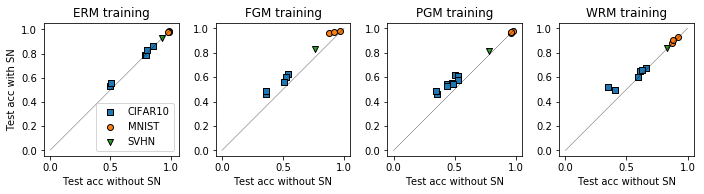

In [29]:
markers = ['s', 'o', 'v', 'D', '+', '.', '^', '*']
plt.figure(figsize=(10, 2.8))
for i, adv in enumerate(['ERM', 'FGM', 'PGM', 'WRM']):
    plt.subplot(1, 4, i+1)
    plt.plot([0, 1], [0, 1], lw=0.3, c='k')
    for j, dataset in enumerate(['CIFAR10', 'MNIST', 'SVHN']):
        rows = tabledf.loc[(tabledf['Training'] == adv) & (tabledf['Dataset'] == dataset)]
        plt.scatter(rows['Test acc'], rows['Test acc (SN)'], label=dataset,
                    marker=markers[j], edgecolor='k')
    plt.xlabel('Test acc without SN')
    if i == 0:
        plt.ylabel('Test acc with SN')
        plt.legend(loc=4)
    plt.title('%s training'%(adv.upper()))
    plt.axis('equal')
plt.tight_layout()
plt.savefig('/data/Figures/table_scatterplots.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

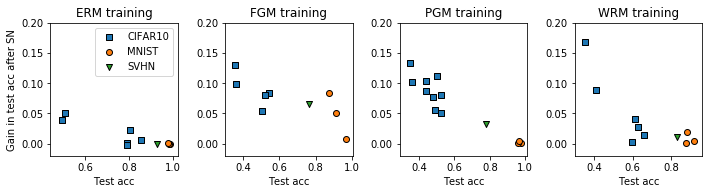

In [30]:
markers = ['s', 'o', 'v', 'D', '+', '.', '^', '*']
plt.figure(figsize=(10, 2.8))
for i, adv in enumerate(['ERM', 'FGM', 'PGM', 'WRM']):
    plt.subplot(1, 4, i+1)
    for j, dataset in enumerate(['CIFAR10', 'MNIST', 'SVHN']):
        rows = tabledf.loc[(tabledf['Training'] == adv) & (tabledf['Dataset'] == dataset)]
        plt.scatter(rows['Test acc'], rows['Test acc (SN)']-rows['Test acc'], label=dataset,
                    marker=markers[j], edgecolor='k')
    plt.xlabel('Test acc')
    if i == 0:
        plt.ylabel('Gain in test acc after SN')
        plt.legend(loc=1)
    plt.title('%s training'%(adv.upper()))
    plt.ylim([-0.02, 0.2])
#     plt.axis('equal')
plt.tight_layout()
plt.savefig('/data/Figures/table_scatterplots.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()